**Importando Pandas, matplotlib e dataset**

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("manipulacao3.csv")


**1. Visualizando colunas e verificando a presença de dados nulos.**

In [92]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [94]:
df.isna().sum()

,0
Transaction ID,0
Item,333
Quantity,138
Price Per Unit,179
Total Spent,173
Payment Method,2579
Location,3265
Transaction Date,159


**2. Removendo valores duplicados:**

In [95]:
df.drop_duplicates()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02


**3. Convertendo data do tipo object para dateTime.**

In [96]:
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"], errors="coerce")

**4. Criando gráficos para as colunas numéricas.**

<Axes: >

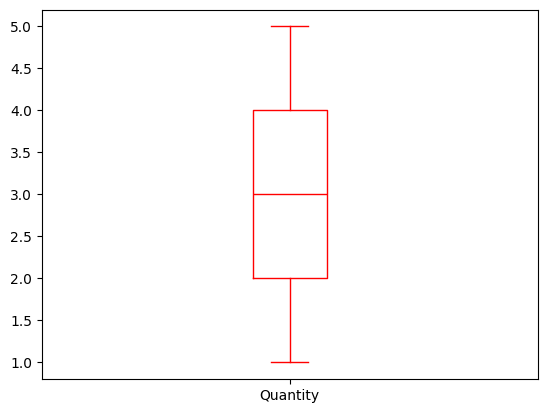

In [97]:
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

df.plot.box(y='Quantity', color='red')

<Axes: >

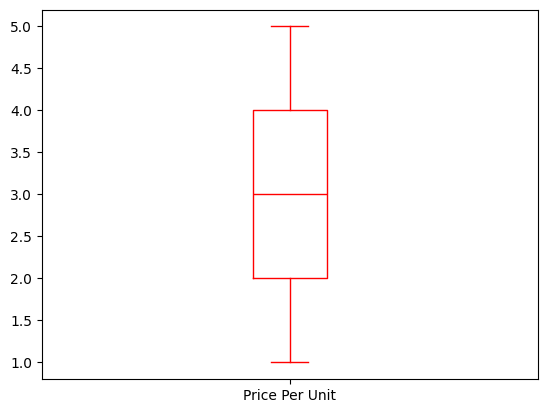

In [98]:
df.plot.box(y='Price Per Unit', color='red')

<Axes: >

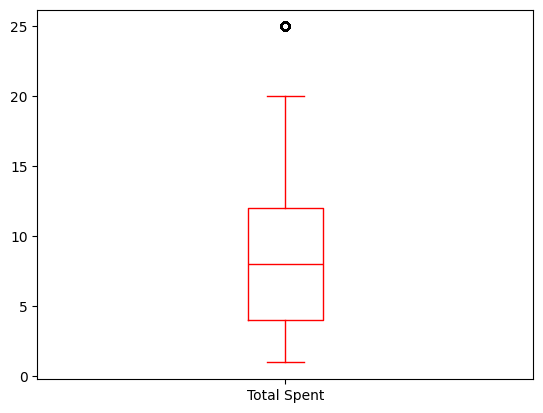

In [99]:
df.plot.box(y='Total Spent', color='red')

**5. Corrigindo a coluna "Total Spent"**

In [100]:
df['Quantity'] = pd.to_numeric(df['Quantity'].replace(['ERROR', 'UNKNOWN', ''], pd.NA), errors='coerce')
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'].replace(['ERROR', 'UNKNOWN', ''], pd.NA), errors='coerce')

df['Total Spent'] = pd.to_numeric(df['Total Spent'].replace(['ERROR', 'UNKNOWN', ''], pd.NA), errors='coerce')
df['Total Spent'] = df['Total Spent'].fillna(df['Quantity'] * df['Price Per Unit'])

**6. Preenchendo valores nulos, ERROR ou UNKNOWN com a média.**

In [101]:
colunas_numericas = ["Quantity", "Price Per Unit", "Total Spent"]

for column in colunas_numericas:
    df[column] = df[column].replace(["UNKNOWN", "ERROR"], pd.NA)
    df[column] = df[column].fillna(df[column].mean())

df["Total Spent"] = df["Quantity"] * df["Price Per Unit"]

**7. Convertendo colunas tipo "object" para "number".**

In [102]:
numeric_columns = ['Quantity', 'Price Per Unit', 'Total Spent']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

**8. Identificando outliers.**

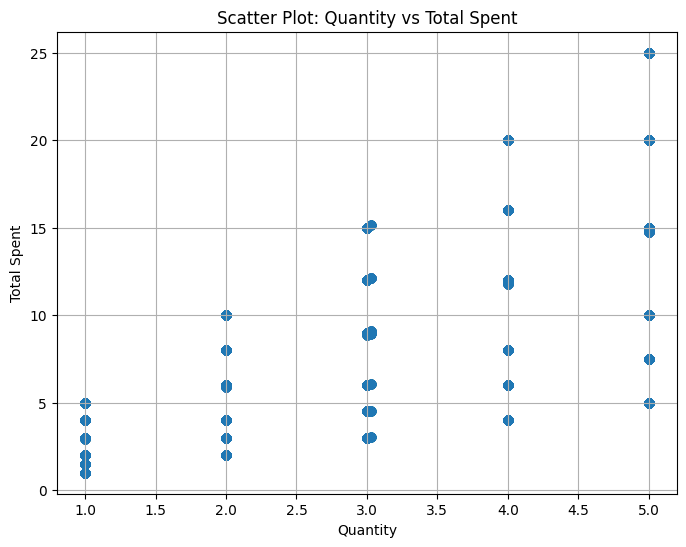

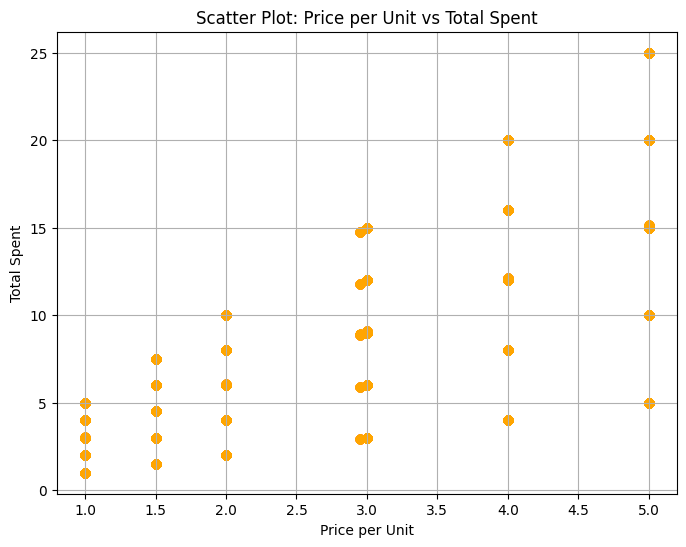

In [103]:
# Scatter entre Quantity vs Total Spent
plt.figure(figsize=(8, 6))
plt.scatter(df['Quantity'], df['Total Spent'], alpha=0.7)
plt.title('Scatter Plot: Quantity vs Total Spent')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.grid(True)
plt.show()

# Scatter entre Price per Unit vs Total Spent
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Per Unit'], df['Total Spent'], alpha=0.7, color='orange')
plt.title('Scatter Plot: Price per Unit vs Total Spent')
plt.xlabel('Price per Unit')
plt.ylabel('Total Spent')
plt.grid(True)
plt.show()

**9. Padronizando valores nulos em variáveis categóricas.**

In [104]:
categorical_columns = ['Item', 'Payment Method', 'Location']

for column in categorical_columns:
    df[column] = df[column].replace(['ERROR', 'UNKNOWN', ''], 'MISSING').fillna('MISSING')

**10. Convertendo variáveis categóricas em numéricas utilizando One-Hot Encoding.**

In [105]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in categorical_columns:
    df[f'{column}_encoded'] = le.fit_transform(df[column])

**11. Normalizando as colunas.**

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

le = LabelEncoder()
for column in categorical_columns:
    df[f'{column}_encoded'] = le.fit_transform(df[column])

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

final_df = df[[*numeric_columns, *[f"{col}_encoded" for col in categorical_columns]]]

print(final_df.head())

   Quantity  Price Per Unit  Total Spent  Item_encoded  \
0      0.25            0.25     0.125000             1   
1      0.75            0.50     0.458333             0   
2      0.75            0.00     0.125000             2   
3      0.25            1.00     0.375000             5   
4      0.25            0.25     0.125000             1   

   Payment Method_encoded  Location_encoded  
0                       1                 2  
1                       0                 0  
2                       1                 0  
3                       3                 1  
4                       2                 0  
